#**Netflix Recomendation  Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset file
netflix_dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

# Convert Ratings column to a float
netflix_dataset['Rating'] = netflix_dataset['Rating'].astype(float)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading dataset file

netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
  # #Getting the unique count of :
  # Movies
  # Customers
  # Rating

In [6]:
netflix_dataset.isna().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [7]:
movie_count=netflix_dataset.isna().sum()["Rating"]
movie_count

4499

In [8]:
customer_count=netflix_dataset["Cust_Id"].nunique() - movie_count
customer_count

470758

In [9]:
rating_count=netflix_dataset["Rating"].count() - movie_count
rating_count

24049265

In [10]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [11]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


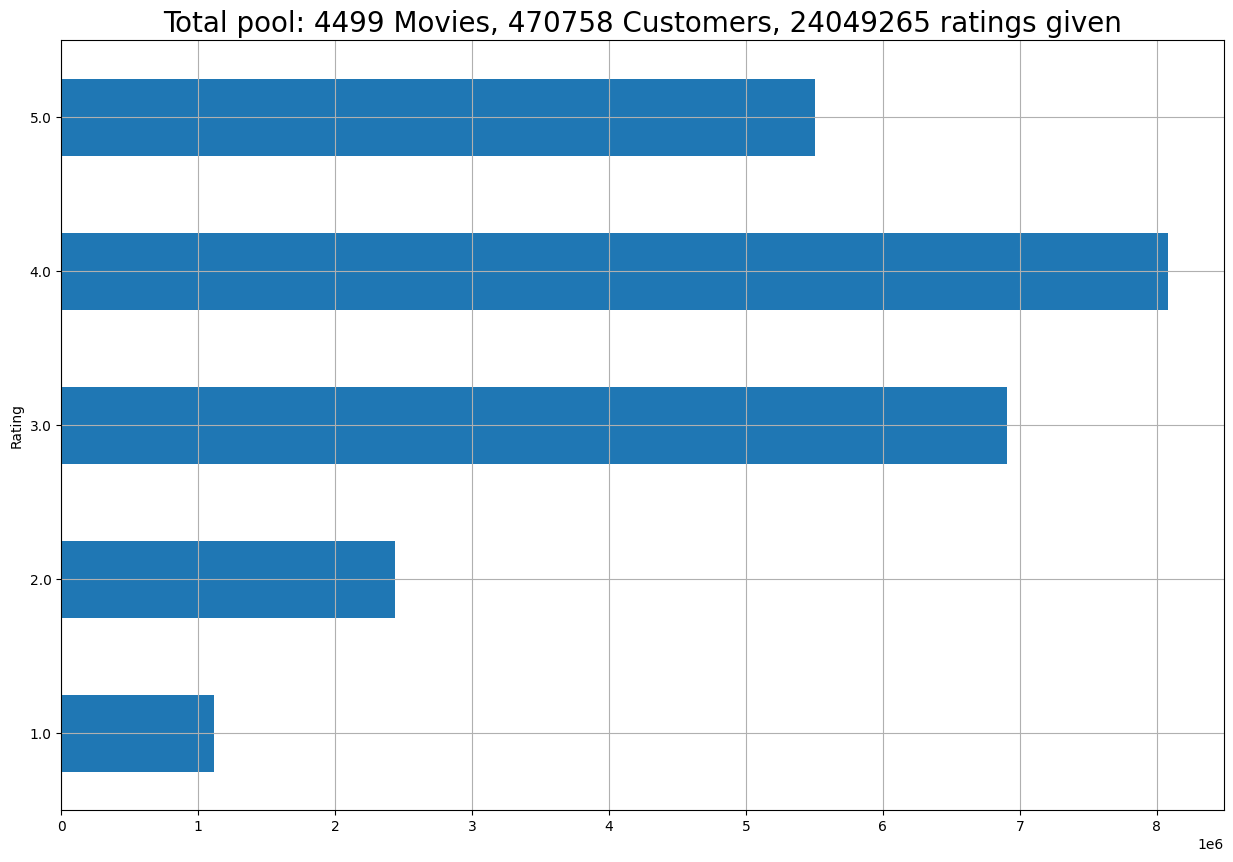

In [12]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [13]:
# seperating the movie Id's from Cust ID columns
movie_id=None
movie_np=[]

for cust_id in netflix_dataset["Cust_Id"]:
  if ":" in cust_id:
    movie_id=int(cust_id.replace(":",""))
  movie_np.append(movie_id)


In [14]:
len(movie_np)

24058263

In [15]:
movie_np[-1]   # last movie id

4499

In [16]:
netflix_dataset["Movie_Id"]=movie_np

In [17]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [18]:
netflix_dataset.dropna(inplace=True)

In [19]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [20]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [21]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

In [22]:
netflix_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [26]:
#pre filtering of data

# model Building

#Recommendation

In [23]:
# filtering out the movies with less count of rating

dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [24]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [25]:
movie_benchmark=round(dataset_movie_summary["count"].quantile(0.60))

In [26]:
movie_benchmark

908

In [27]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary["count"]<movie_benchmark].index

In [28]:
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [29]:
# filtering out the Customers given rating to less no. of movies
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])


In [30]:
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [31]:
cust_benchmark=round(dataset_cust_summary["count"].quantile(0.60))

In [32]:
cust_benchmark

36

In [33]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary["count"]<cust_benchmark].index

In [34]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=282042)

In [35]:
netflix_dataset=netflix_dataset[~netflix_dataset["Movie_Id"].isin(drop_movie_list)]   #Excluding the Rejected movies

In [36]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [48]:
netflix_dataset=netflix_dataset[~netflix_dataset["Cust_Id"].isin(drop_cust_list)]   #Excluding the Rejected Customers
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


**Dealing with 2nd dataset having movies with titiles**

In [38]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, usecols=[0,1,2], names = ['Movie_Id', 'Year', 'Name'])

In [49]:
#df_title = pd.read_csv("/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [39]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


# **Model Building**

In [53]:
#Need to install surprise library
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357264 sha256=9cabb5acdab60a5eb7ed88dad08331e48d200ef797cb1adb821d95b826bff4aa
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [40]:
from surprise import Reader,SVD,Dataset

In [41]:
reader=Reader()

In [60]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:1000000], reader)  # converting my netflix-dataset into SVD readable format

In [62]:
model=SVD()  # building the object for the class

In [63]:
from surprise.model_selection import cross_validate

In [64]:
cross_validate(model,data,measures=['RMSE'],cv=3)

{'test_rmse': array([0.96832302, 0.96694666, 0.96973461]),
 'fit_time': (22.48273777961731, 21.77837896347046, 22.01941680908203),
 'test_time': (5.331247568130493, 5.090888023376465, 5.665683269500732)}

In [65]:
model

# **Recommendations**

In [66]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [67]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [68]:
user_1331154=df_title.copy()  # create a shallow copy of your title dataset for individual learner

In [69]:
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [70]:
user_1331154=user_1331154[~user_1331154["Movie_Id"].isin(drop_movie_list)]   #Excluding the Rejected movies


In [71]:
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [72]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)

<ipython-input-72-8e621200fbf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [73]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.364863
4,5,2004.0,The Rise and Fall of ECW,3.858347
5,6,1997.0,Sick,3.588664
7,8,2004.0,What the #$*! Do We Know!?,3.619055
15,16,1996.0,Screamers,3.250423
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.670508
17766,17767,2004.0,Fidel Castro: American Experience,3.670508
17767,17768,2000.0,Epoch,3.670508
17768,17769,2003.0,The Company,3.670508


In [75]:
# Top 5 movies that user_1331154 will like
user_1331154.sort_values(ascending=False,by='Estimate_Score').head()

,Movie_Id,Year,Name,Estimate_Score
67,68,2004.0,Invader Zim,4.373741
190,191,2003.0,X2: X-Men United,4.341656
137,138,1995.0,Star Trek: Voyager: Season 1,4.322977
269,270,2001.0,Sex and the City: Season 4,4.280433
75,76,1952.0,I Love Lucy: Season 2,4.276546


In [76]:
# Next user
user_1055714=df_title.copy()

In [77]:
user_1055714=user_1055714[~user_1055714["Movie_Id"].isin(drop_movie_list)]   #Excluding the Rejected movies


In [78]:
user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)


In [80]:
# Top 5 movies that user_1055714 will like
user_1055714=user_1055714.sort_values(ascending=False,by='Estimate_Score').head()

In [82]:
user_1055714["Name"].values   # top 5 recommended movies for the 1055714 user

array(['Touched by an Angel: Season 1',
       "ABC Primetime: Mel Gibson's The Passion of the Christ",
       'Viva La Bam: Season 1', 'Husbands and Wives',
       "Chappelle's Show: Season 1"], dtype=object)